In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Rappel du sujet

- 15 actifs min et 40 max
- chaque actif ne doit pas etre superieux a 10% du portefeuille

# Manager API

In [3]:

class RESTManager:
    HOST_NAME = "dolphin.jump-technology.com"
    PORT = "8443"

    URL = "https://" + HOST_NAME + ":" + PORT + "/api/v1/"

    USERNAME_USER1 = "EPITA_GROUPE8"
    PASSWORD_USER1 = "AgLyQx64Jw6pAkW9"

    auth = (USERNAME_USER1, PASSWORD_USER1)


    def get(self, path):
        return requests.get(self.URL+path, auth=self.auth, verify=False).text
    
    def post(self, path, data):
        
        return requests.put(self.URL+path, auth=self.auth, data=data, verify=False)
    
    def get_asset(self):
        dt_text = self.get("asset")
        dt = json.loads(dt_text)
        df = []
        for i in range(len(dt)):
            tmp = {}
            for key in dt[i]:
                tmp[key] = dt[i][key]["value"]
            df.append(tmp)
        df = pd.DataFrame(df)
        return df
    
    def get_asset_id(self, uid):
        dt_text = self.get(f"asset/{uid}")
        dt = json.loads(dt_text)
        df={}
        for key in dt:
            df[key] = dt[key]["value"]
        #df = pd.DataFrame(df)
        return df
    
    def get_asset_id_quote(self, uid):
        dt_text = self.get(f"asset/{uid}/quote")
        dt = json.loads(dt_text)
        df = []
        for i in range(len(dt)):
            tmp = {}
            for key in dt[i]:
                tmp[key] = dt[i][key]["value"]
            df.append(tmp)
        df = pd.DataFrame(df)
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
        #l = ["ask" ,"asset" ,"bid" ,"close" ,"feed_source" ,"gross" ,"high" ,"low","nav" ,"open", "pl" ,"real_close_price" ,"return" ,"volume"]
        l = ["return","nav"]
        for elt in l:
            df[elt] = df[elt].str.replace(',', '.').astype(float)
        return df
    
    def get_ratio(self):
        self.get("ratio")
    
    def sharpe(self, df, taux_sans_risque, periode=30):
        df['Log_Ret'] = np.log(df['close'] / df['close'].shift(1))
        df['Volatility'] = df['Log_Ret'].rolling(window=periode).std() * np.sqrt(periode)
        sharpe = (df["return"] - taux_sans_risque["1 mois"])/df["Volatility"]
        return sharpe
    
    def get_portfolio(self):
        resp = self.get("portfolio/1827/dyn_amount_compo")
        return resp

    def push(self, data):
        return self.post("portfolio/1827/dyn_amount_compo", data)
        

req = RESTManager()

In [210]:
HOST_NAME = "dolphin.jump-technology.com"
PORT = "8443"

URL = "https://" + HOST_NAME + ":" + PORT + "/api/v1/"

USERNAME_USER1 = "EPITA_GROUPE8"
PASSWORD_USER1 = "AgLyQx64Jw6pAkW9"

auth = (USERNAME_USER1, PASSWORD_USER1)

requests.get(URL+"asset", auth=auth, verify=False).text

'[{"GLOBAL_TYPE":{"type":"string","value":"Actif"},"IS_EUROLAND":{"type":"boolean","value":"true"},"LAST_QUOTES_UPDATE_DATE":{"type":"date-time","value":"2020-10-23T11:48:37.000+02:00"},"REST_OBJECT_ID":{"type":"string","value":"1845"},"asset_attr_init":{"type":"string","value":"a garder"},"SUB_TYPE":{"type":"asset_sub_type","value":"ORDINARY_STOCK"},"LAST_CLOSE_VALUE":{"type":"currency_value","value":"26,158358284815 EUR"},"ASSET_STATUS":{"type":"asset_status","value":"normal"},"ISIN_CODE":{"type":"string","value":"DE0005545503"},"CATEGORY_CIC":{"type":"string","value":"Equity"},"IS_PUBLICLY_TRADED":{"type":"boolean","value":"true"},"PORT_LINE_COUNT":{"type":"int32","value":"0"},"COUNTRY":{"type":"string","value":"Allemagne"},"MARKET_PLACE_OR_ASSET_COUNTRY":{"type":"string","value":"Allemagne"},"GICS_SECTOR":{"type":"string","value":"Services de Communication"},"IS_DEPOSITARY_QUOTES":{"type":"boolean","value":"false"},"LIQUIDITY_ALGO":{"type":"liquidity_algorithm","value":"UseGridLiqu

In [208]:
df_asset = req.get_asset()
df_asset

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 1579238 (char 1579237)

In [6]:
df_asset[["ASSET_DATABASE_ID", "CURRENCY","MARKET_PLACE_CURRENCY", "TYPE"]]

,ASSET_DATABASE_ID,CURRENCY,MARKET_PLACE_CURRENCY,TYPE
0,1845,EUR,EUR,STOCK
1,1846,EUR,EUR,STOCK
2,2122,EUR,EUR,FUND
3,2123,EUR,EUR,FUND
4,2124,EUR,EUR,FUND
5,1428,EUR,EUR,FUND
6,1847,EUR,EUR,STOCK
7,1848,EUR,EUR,STOCK
8,1849,EUR,EUR,STOCK
9,2154,USD,EUR,FUND


In [7]:
print(req.get_asset_id("2122"))
print(req.get_asset_id("1845"))

{'REST_OBJECT_ID': '2122', 'REST_UNIQUE_NUMBER': '2122', 'LABEL': '1818-VEGA EUR CO', 'TYPE': 'FUND', 'CURRENCY': 'EUR', 'BLOOMBERG_CODE': 'VEGCEQD FP EQUITY', 'ISIN_CODE': 'FR0010626796', 'SUB_SECTOR': 'Instruments de placement hors actions', 'MARKET_PLACE': 'No Place', 'COUNTRY': 'France', 'IS_PUBLICLY_TRADED': 'true', 'ELIGIBLE_PEA': 'true', 'QUOTE_TYPE': 'value', 'IS_STRUCTURED_PRODUCT': 'false', 'IS_DEPOSITARY_QUOTES': 'false', 'IS_ACCESSIBILITY_PUBLIC': 'true', 'ASSET_STATUS': 'normal', 'CITY_OR_ACRONYM_OR_NAME': 'no_place', 'SUB_TYPE': 'OPCVM', 'TRANSPARENCY_LIST': '', 'CODE_CIC': 'XL41', 'BOND_RISK_COMPUTATION_MODE': 'Par défaut', 'LIQUIDITY_ALGO': 'PerVolLiquidityAlgorithm', 'BLOOMBERG_ID': 'BBG000NBHV66', 'quote_value_type': 'Défaut', 'ASSET PRICE MODE': 'Par Défaut (configuration)', 'PAY_ACCOUNT_ON_DEFAULT': 'false', 'ELIGIBLE_PEA_PME': 'true', 'ASSET_DATABASE_ID': '2122', 'EMIR_CLEARING_ID_TYPE': 'LEI', 'BOND_CREDIT_RISK_COMPUTATION_MODE': 'Par défaut', 'BOND_YTM_COMPUTATIO

In [8]:
req.get("ratio")

'[{"id":11,"type":"Ratio","name":"Correlation","is_benchmark_needed":true,"is_percent":false},{"id":7,"type":"Ratio","name":"Exposition action","is_benchmark_needed":false,"is_percent":true},{"id":15,"type":"Ratio","name":"Exposition action","is_benchmark_needed":false,"is_percent":true},{"id":8,"type":"Ratio","name":"RDT","is_benchmark_needed":false,"is_percent":true},{"id":13,"type":"Ratio","name":"Rendement","is_benchmark_needed":false,"is_percent":true},{"id":9,"type":"Ratio","name":"Rendement_annualise","is_benchmark_needed":false,"is_percent":true},{"id":12,"type":"Ratio","name":"Sharpe","is_benchmark_needed":false,"is_percent":false},{"id":14,"type":"Ratio","name":"VaR historique","is_benchmark_needed":false,"is_percent":true},{"id":10,"type":"Ratio","name":"Volatilite","is_benchmark_needed":false,"is_percent":true}]'

In [9]:
dt_text = req.get(f"asset/1845/quote")
dt = json.loads(dt_text)
pd.DataFrame(dt)
df = []
for i in range(len(dt)):
    tmp = {}
    for key in dt[i]:
        tmp[key] = dt[i][key]["value"]
    df.append(tmp)
df = pd.DataFrame(df)
df

,ask,asset,bid,close,date,feed_source,gross,high,low,nav,open,pl,real_close_price,return,volume
0,"12,58",1845,"12,58","12,585",2013-06-03,-10,"12,585","12,67","12,08","12,585","12,6",0,"12,585",0,742280
1,"12,67",1845,"12,59","12,67",2013-06-04,-10,"12,67","12,95","12,5","12,67","12,65","0,085","12,67","0,006754072308",544604
2,"12,37",1845,"12,295","12,35",2013-06-05,-10,"12,35","12,66","12,34","12,35","12,579","-0,32","12,35","-0,025256511444",649313
3,"12,37",1845,"12,355","12,355",2013-06-06,-10,"12,355","12,45","12,25","12,355","12,35","0,005","12,355","0,0004048583",371998
4,"12,555",1845,"12,475","12,48",2013-06-07,-10,"12,48","12,63","12,25","12,48","12,35","0,125","12,48","0,010117361392",303439
5,"12,495",1845,"12,415","12,43",2013-06-10,-10,"12,43","12,625","12,37","12,43","12,445","-0,05","12,43","-0,004006410256",210296
6,"12,445",1845,"12,38","12,405",2013-06-11,-10,"12,405","12,481","12,265","12,405","12,37","-0,025","12,405","-0,002011263073",285197
7,"12,325",1845,"12,3","12,3",2013-06-12,-10,"12,3","12,435","12,28","12,3","12,375","-0,105","12,3","-0,0084643289",310978
8,"12,125",1845,"12,05","12,01",2013-06-13,-10,"12,01","12,32","11,715","12,01","12,235","-0,29","12,01","-0,023577235772",1020589
9,"12,13",1845,"12,075","12,12",2013-06-14,-10,"12,12","12,17","12,01","12,12","12,01","0,11","12,12","0,009159034138",312048


In [85]:
dt_text = req.get(f"asset/2122/quote")
dt = json.loads(dt_text)
pd.DataFrame(dt)
df = []
for i in range(len(dt)):
    tmp = {}
    for key in dt[i]:
        tmp[key] = dt[i][key]["value"]
    df.append(tmp)
df = pd.DataFrame(df)
df

,asset,close,date,feed_source,gross,nav,pl,real_close_price,return
0,2122,"31,098",2013-06-03,-10,"31,098","31,098",0,"31,098",0
1,2122,"31,166",2013-06-04,-10,"31,166","31,166","0,068","31,166","0,002186635797"
2,2122,"30,793",2013-06-05,-10,"30,793","30,793","-0,373","30,793","-0,011968170442"
3,2122,"30,478",2013-06-06,-10,"30,478","30,478","-0,315","30,478","-0,010229597636"
4,2122,"30,909",2013-06-07,-10,"30,909","30,909","0,431","30,909","0,014141347857"
5,2122,"30,924",2013-06-10,-10,"30,924","30,924","0,015","30,924","0,000485295545"
6,2122,"30,492",2013-06-11,-10,"30,492","30,492","-0,432","30,492","-0,013969732247"
7,2122,"30,464",2013-06-12,-10,"30,464","30,464","-0,028","30,464","-0,000918273646"
8,2122,"30,384",2013-06-13,-10,"30,384","30,384","-0,08","30,384","-0,00262605042"
9,2122,"30,457",2013-06-14,-10,"30,457","30,457","0,073","30,457","0,002402580305"


# Optimisation de portefeuille

In [12]:
def sharpe(w,mat_return):
    mat_cov = np.cov(mat_return)# * mat_return.shape[1]


    if w.ndim != 1:
        variance = []
        for i in range(w.shape[0]):
            variance.append(w[i] @ mat_cov @ w[i].T)
    else:
        variance = w @ mat_cov @ w.T
        
    variance = np.array(variance)
    std = np.sqrt(variance)
    average_rend = mat_return.mean(axis=1)
    
    return (variance, std, average_rend@w.T)


# rendement & volatilité

Commençons par calculer la volatilité et le rendement de chaque actif pour pouvoir etablir un classement.

## 1) Récuperation des rendements

In [127]:
list_id = df_asset["ASSET_DATABASE_ID"].values
l_id = []

#Pour avoir l'index
a = req.get_asset_id_quote(list_id[0])[["return"]]
list_return = pd.DataFrame(index=a.index)
list_nav = pd.DataFrame(index=a.index)


for elt in list_id:
    try:
        df_tmp = req.get_asset_id_quote(elt)
        list_return[elt] = df_tmp["return"]
        list_nav[elt] = df_tmp["nav"]
        l_id.append(elt)
    except:
        pass
l_id = np.array(l_id)
list_nav = list_nav.fillna(method='ffill')

In [89]:
print(l_id.shape)
print(list_return.shape)

(472,)
(1898, 472)


on veut le rendement sur 2016-06-01 jusqu'a 2020-09-30

In [128]:
import datetime as dt
start = dt.datetime.strptime('2016-06-01', '%Y-%m-%d')
end = dt.datetime.strptime('2020-09-30', '%Y-%m-%d')
sdf = (list_return.index > start) & (list_return.index < end)

l_return = list_return.loc[sdf]
l_return = l_return.fillna(0)

## 2) Classement

In [129]:
rend_l = l_return.values.mean(axis=0)
std_l = l_return.values.std(axis=0)
rend_l.shape

(473,)

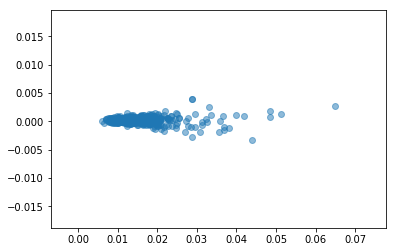

In [130]:
plt.scatter(std_l,rend_l, alpha=0.5)

In [131]:
sort_rend = np.argsort(rend_l)
sort_std = np.argsort(std_l)

#classement
classement = np.zeros_like(sort_rend)
for i in range(len(sort_rend)):
    classement[sort_rend[i]] += i*20
    classement[sort_std[len(sort_rend)-1-i]] += i

## 3) optimization (n=2) [a la main]

[299 199]
[0.02883616 0.01237531] [0.00400682 0.00145298]


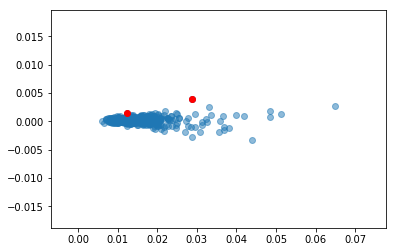

In [132]:
res = np.argsort(classement)[-2:]
print(res)
print(std_l[res],rend_l[res])

plt.scatter(std_l,rend_l, alpha=0.5)
plt.scatter(std_l[res],rend_l[res], c="red")

[299 199] [0.00400682 0.00145298]
rend: 0.001393861848862451 & volatilité: 0.013454857142993205 -> poid: [0.32323232 0.67676768]


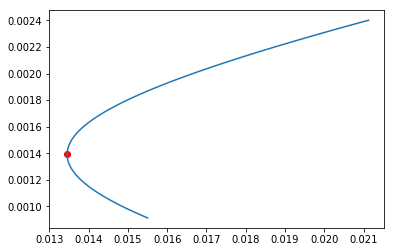

In [133]:
print(res,rend_l[res])

mat_return = np.array(l_return.values[res])
mat_return = np.nan_to_num(mat_return)

w = np.linspace(0, 1, num=100)
W = np.array([w, 1-w]).T

variance, std, rend = sharpe(W, mat_return)

minimum = np.argmin(std)
print(f"rend: {rend[minimum]} & volatilité: {std[minimum]} -> poid: {W[minimum]}")

plt.plot(std,rend)
plt.scatter(std[minimum], rend[minimum], c="red")

## Optimization (n=3) [a la main]

[293 299 199]


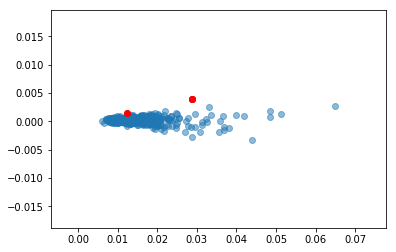

In [134]:
import itertools

w = np.linspace(0, 1, num=100)

n_w = np.array(list(itertools.permutations(w, 3)))

n_w = n_w[np.sum(n_w,axis=1) == 1]

res = np.argsort(classement)[-3:]
print(res)

plt.scatter(std_l,rend_l, alpha=0.5)
plt.scatter(std_l[res],rend_l[res], c="red")

In [135]:
mat_return = np.array(l_return.values[res])
mat_return = np.nan_to_num(mat_return)

variance, std, rend = sharpe(n_w, mat_return)

rend: 0.00012020604644397446 & volatilité: 0.010406995762705804 -> poid: [0.45454545 0.15151515 0.39393939]


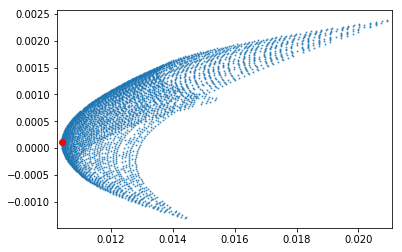

In [136]:
minimum = np.argmin(std)

print(f"rend: {rend[minimum]} & volatilité: {std[minimum]} -> poid: {n_w[minimum]}")

plt.margins(x=0, y=-0.01)
plt.scatter(std,rend,s=1, alpha=0.7)
plt.scatter(std[minimum], rend[minimum], c="red")

# Optimization (minimal var) [avec Resolution analytique]

> https://www.ephiquant.com/optimisation-de-portefeuille-modele-mean-variance-de-markowitz/

on cherche a optimiser le programme quadratique suivant

$$ 
 \left\{
    \begin{array}{ll}
       Min \ \sigma^2_p(w) = w^T\sigma w \\
       w^Tu = 1
    \end{array}
\right.$$

on va utiliser la méthode du multiplicateur de Lagrange:

$$
\mathcal{L}(\omega,\lambda) = \omega^\top \sigma \omega - \lambda(\omega^\top u-1)
$$

> où $\lambda$ est le multiplicateur de Lagrange

Nous allons ensuite calculer les dérivées partielles que nous allons spécifier égales à 0 : 

$$
\begin{cases} \frac{\partial\mathcal{L}}{\omega}= 2\sigma\omega-\lambda u=0 \quad \text{(a)}\\  \frac{\partial\mathcal{L}}{\partial\lambda}=\omega^\top u-1=0 \quad\quad\text{(b)}\end{cases}
$$

Nous allons d’abord tirer $\omega$ dans l’équation (a), après quoi nous allons le remplacer dans l’équation (b) par son expression: 

$$
\begin{split} \text{(a)} \quad 2\sigma\omega-\lambda u=0\quad  \implies \omega &= \frac{1}{2}\lambda\sigma^{-1}u \\ \text{(b)} \quad \omega^\top u-1=0 \implies \omega^\top u &= 1 \\ \frac{1}{2}\lambda u^\top\sigma^{-1}u &=1 \\  \lambda &= \frac{2}{u^\top\sigma^{-1}u} \end{split}
$$

Nous allons mettre cette dernière expression de $\lambda$ dans l’expression de $\omega$. Cela donnera ceci : 

$$
\begin{equation*}\omega=\frac{1}{2} \bigg(\frac{2}{u^{\top}\sigma^{-1}u} \bigg) \sigma^{-1}u \implies \omega=\frac{\sigma^{-1}u}{u^\top\sigma^{-1}u} \end{equation*}
$$

In [108]:
# u = [1, ..., 1]

In [137]:
res = np.argsort(classement)[-2:]
r = rend_l[res]
u = np.ones(r.shape[0])
mat_return = np.array(l_return.values[res])

sigma = np.cov(mat_return)

sigma_inv = np.linalg.inv(sigma) 

w = (sigma_inv @ u) / (u.T @ sigma_inv @ u)

w

array([0.32107312, 0.67892688])

rend: 0.001393861848862451 & volatilité: 0.013454857142993205 -> poid: [0.32323232 0.67676768]
rend: 0.0013906476194541794 & volatilité: 0.013454757452558124 -> poid: [0.32107312 0.67892688]


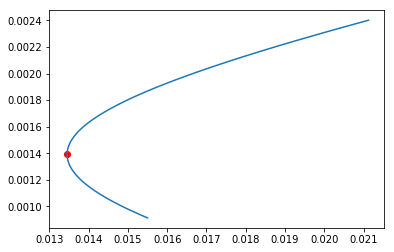

In [138]:
w_ = np.linspace(0, 1, num=100)
W = np.array([w_, 1-w_]).T


variance, std, rend = sharpe(W, mat_return)

minimum = np.argmin(std)

print(f"rend: {rend[minimum]} & volatilité: {std[minimum]} -> poid: {W[minimum]}")

plt.plot(std,rend)

variance, std, rend = sharpe(w, mat_return)

plt.scatter(std, rend, c="red")
print(f"rend: {rend} & volatilité: {std} -> poid: {w}")

## resolution analytique avec les 15 meilleurs actifs

In [139]:
res = np.argsort(classement)[-20:]
r = rend_l[res]
u = np.ones(r.shape[0])
mat_return = np.array(l_return.values[res])

sigma = np.cov(mat_return)

sigma_inv = np.linalg.inv(sigma) 

w = (sigma_inv @ u) / (u.T @ sigma_inv @ u)

w

array([ 0.07227428,  0.05426782,  0.05539843,  0.11897851, -0.01879042,
        0.07365803,  0.04373282,  0.03643084,  0.10454766,  0.01482082,
        0.07489042,  0.03221484, -0.01451531,  0.09647409,  0.04448385,
        0.01270555,  0.04979508,  0.06649858,  0.03159001,  0.05054408])

In [140]:
variance, std, rend = sharpe(w, mat_return)
print(f"rend: {rend} & volatilité: {std} -> poid: {w}")

rend: 0.0013697558645341446 & volatilité: 0.003098396572059201 -> poid: [ 0.07227428  0.05426782  0.05539843  0.11897851 -0.01879042  0.07365803
  0.04373282  0.03643084  0.10454766  0.01482082  0.07489042  0.03221484
 -0.01451531  0.09647409  0.04448385  0.01270555  0.04979508  0.06649858
  0.03159001  0.05054408]


## Benchmark

Regardons l'influence du nombre d'actif sur le rendement et la volatilité.

[2] rend: 0.0013906476194541794 & volatilité: 0.013454757452558124
[3] rend: 9.80433702983879e-05 & volatilité: 0.010405847873223711
[4] rend: 0.0013756575409886995 & volatilité: 0.008698503936439358
[5] rend: 0.003416321522009877 & volatilité: 0.007642852580968165
[6] rend: 0.0030295667536234796 & volatilité: 0.006605074982986327
[7] rend: 0.00215085436470331 & volatilité: 0.005372896940651355
[8] rend: 0.002253317708929768 & volatilité: 0.00521079657851889
[9] rend: 0.0024937227796165617 & volatilité: 0.005130454738946043
[10] rend: 0.00222210786786097 & volatilité: 0.004661075807109932
[11] rend: 0.0023242469043404613 & volatilité: 0.004595532647549997
[12] rend: 0.0018811928891050778 & volatilité: 0.004205470874124594
[13] rend: 0.001975372633586119 & volatilité: 0.004174285440388045
[14] rend: 0.0019131087738845783 & volatilité: 0.00401032511668983
[15] rend: 0.0016786762324091274 & volatilité: 0.0037749104054920473
[16] rend: 0.0015562009260363763 & volatilité: 0.0037369084280805

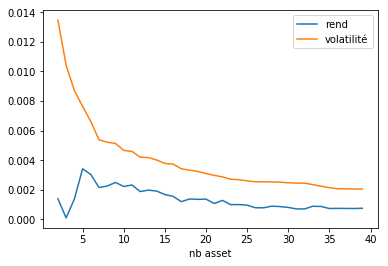

In [141]:
hist = []
for i in range(2,40,1):
    res = np.argsort(classement)[-i:]
    r = rend_l[res]
    u = np.ones(r.shape[0])
    mat_return = np.array(l_return.values[res])

    sigma = np.cov(mat_return)
    sigma_inv = np.linalg.inv(sigma) 

    w = (sigma_inv @ u) / (u.T @ sigma_inv @ u)
    variance, std, rend = sharpe(w, mat_return)
    print(f"[{i}] rend: {rend} & volatilité: {std}")
    hist.append([rend, std])

hist = np.array(hist)

plt.plot(range(2,40,1),hist[:,0], label="rend")
plt.plot(range(2,40,1),hist[:,1], label="volatilité")
plt.xlabel("nb asset")
plt.legend()

## Optimisation

In [142]:
res = np.argsort(classement)[-2:]
r = rend_l[res]
u = np.ones(r.shape[0])
mat_return = np.array(l_return.values[res])

sigma = np.cov(mat_return)
sigma_inv = np.linalg.inv(sigma) 

$$
\begin{equation*}\omega=E\mu_0+F\end{equation*}
$$

avec:

$$
E=\frac{1}{D}\sigma^{-1}(C\mu-Au)\quad \text{et} \quad F=\frac{1}{D}\sigma^{-1}(-A\mu+Bu)
$$


Nous allons définir 
- $A=u^\top\sigma^{-1}\mu=\mu^\top\sigma^{-1}u$ 
- $B=\mu^\top\sigma^{-1}\mu$ 
- $C=u^\top\sigma^{-1}u$
- $D=BC-A^2$

In [143]:
A = u.T @ sigma_inv @ r 
B = r.T @ sigma_inv @ r
C = u.T @ sigma_inv @ u
D = B*C - (A**2)

In [144]:
E = (1/D) * sigma_inv @ (C*r - A*u)
F = (1/D) * sigma_inv @ (-A*r + B*u)

w = E* 0.004 + F
w

array([0.99733108, 0.00266892])

In [145]:
variance, std, rend = sharpe(w, mat_return)
print(f"[{i}] rend: {rend} & volatilité: {std}")

[39] rend: 0.00239733987048407 & volatilité: 0.02107555136784661


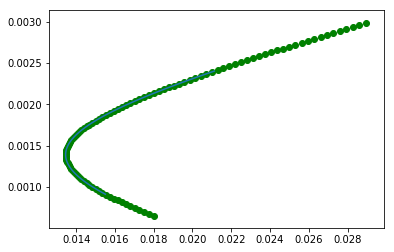

In [146]:
w_ = np.linspace(0, 1, num=100)
W = np.array([w_, 1-w_]).T


variance, std, rend = sharpe(W, mat_return)

minimum = np.argmin(std)
plt.plot(std,rend)

target_ = np.linspace(0.001, 0.005, num=100)
best = ""

for i in target_:
    w = E* i + F
    variance, std, rend = sharpe(w, mat_return)
    if std < rend:
        best = f"rend: {rend} & volatilité: {std}"
        plt.scatter(std, rend, c="red")
    else:
        plt.scatter(std, rend, c="green")
        
print(best)

En Rouge: rendement > risque  
En Vert : rendement < risque

## N=40

In [176]:
res = np.argsort(classement)[-10:]
mat_return = np.array(l_return.values[res])

In [177]:
def get_w(mat_return, u_t= 0.0017):
    r = mat_return.mean(axis=1)
    u = np.ones(r.shape[0])
    
    sigma = np.cov(mat_return)
    sigma_inv = np.linalg.inv(sigma) 
    
    A = u.T @ sigma_inv @ r 
    B = r.T @ sigma_inv @ r
    C = u.T @ sigma_inv @ u
    D = B*C - (A**2)
    
    E = (1/D) * sigma_inv @ (C*r - A*u)
    F = (1/D) * sigma_inv @ (-A*r + B*u)

    w = E* u_t + F
    return w


w_20 = get_w(mat_return, 0.003)
w_20

array([0.14643498, 0.07543483, 0.05066122, 0.15614319, 0.09135614,
       0.09508567, 0.09951856, 0.1125685 , 0.07564421, 0.09715271])

rend: 0.003086956521739131 & volatilité: 0.004181141842849119


array([0.00056253, 0.06713055, 0.05935692, 0.0602406 , 0.099437  ,
       0.05586857, 0.0858339 , 0.06309373, 0.01625454, 0.07762045,
       0.05103095, 0.0776833 , 0.09460795, 0.05981091, 0.0502211 ,
       0.081247  ])

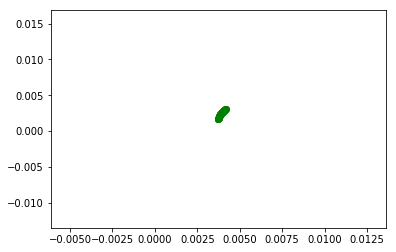

In [184]:
res = np.argsort(classement)[-16:]
mat_return = np.array(l_return.values[res])
target_ = np.linspace(0.001, 0.009, num=300)
best = ""
W=[]

for i in target_:
    w = get_w(mat_return, i)
    if np.sum(w<0) == 0:
        W=w
        variance, std, rend = sharpe(w, mat_return)
        if std < rend:
            best = f"rend: {rend} & volatilité: {std}"
            plt.scatter(std, rend, c="red")
        else:
            best = f"rend: {rend} & volatilité: {std}"
            plt.scatter(std, rend, c="green")
        
print(best)
W

In [193]:
def check_type(list_id):
    print(list_id)
    df_asset = req.get_asset()[["ASSET_DATABASE_ID", "TYPE"]]
    mask = df_asset['ASSET_DATABASE_ID'].isin(list_id)
    pf_type = df_asset.loc[mask]["TYPE"].values
    print(np.unique(pf_type, return_counts=True))
    return np.sum(pf_type == "STOCK")/pf_type.shape[0]
    
    
check_type(l_id[res])

['2035' '1884' '1912' '1538' '2058' '2112' '1956' '1877' '2076' '2034'
 '2023' '1901' '2154' '1827' '2024' '1958']


JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 1579248 (char 1579247)

In [186]:
def get_amout(w, list_id, list_nav, solde= 1000000):
    start = dt.datetime.strptime('2016-06-01', '%Y-%m-%d')
    price = list_nav.loc[list_nav.index == start]
    nb_actif= []
    for i in range(len(list_id)):
        nb = (solde*w[i])//price[list_id[i]].values[0]
        #print(f"montant: {(solde*w[i])}, prix: {price[list_id[i]].values[0]}, nb: {nb}")
        nb_actif.append(nb)
    return np.array(nb_actif)
    
    
get_amout(W, l_id[res], list_nav)

array([6.420000e+02, 1.562900e+04, 3.020000e+03, 2.199000e+03,
       4.592000e+03, 1.193000e+03, 8.785000e+03, 7.181000e+03,
       9.450310e+05, 9.666000e+03, 1.215020e+05, 1.294721e+06,
       4.507000e+03, 5.980000e+02, 5.020000e+02, 5.560000e+02])

In [187]:
def get_asset_pf(w, list_id, list_nav):
    nb = get_amout(w,list_id,list_nav)
    nb = np.nan_to_num(nb)
    ret = []
    for i in range(len(list_id)):
        js = {}
        js["asset"] = int(list_id[i])
        js["quantity"] = int(nb[i])
        ret.append({"asset": js})
    return ret

new_pt = get_asset_pf(W, l_id[res], list_nav)
new_pt

[{'asset': {'asset': 2035, 'quantity': 642}},
 {'asset': {'asset': 1884, 'quantity': 15629}},
 {'asset': {'asset': 1912, 'quantity': 3020}},
 {'asset': {'asset': 1538, 'quantity': 2199}},
 {'asset': {'asset': 2058, 'quantity': 4592}},
 {'asset': {'asset': 2112, 'quantity': 1193}},
 {'asset': {'asset': 1956, 'quantity': 8785}},
 {'asset': {'asset': 1877, 'quantity': 7181}},
 {'asset': {'asset': 2076, 'quantity': 945031}},
 {'asset': {'asset': 2034, 'quantity': 9666}},
 {'asset': {'asset': 2023, 'quantity': 121502}},
 {'asset': {'asset': 1901, 'quantity': 1294721}},
 {'asset': {'asset': 2154, 'quantity': 4507}},
 {'asset': {'asset': 1827, 'quantity': 598}},
 {'asset': {'asset': 2024, 'quantity': 502}},
 {'asset': {'asset': 1958, 'quantity': 556}}]

## Porte-Feuille

In [188]:
new_portfolio = {
    "label":"EPITA_PTF_8",
    "currency": {
        "code":"EUR"
    },
    "type":"front",
    "values": {
        "2016-06-01": new_pt
    }
}
pp = json.dumps(new_portfolio)

In [189]:
req.push(pp).text

''

In [190]:
portfolio = req.get_portfolio()
portfolio

'{"label":"EPITA_PTF_8","currency":{"code":"EUR"},"type":"front","values":{"2016-06-01":[{"asset":{"asset":2112,"quantity":1193.0}},{"asset":{"asset":1538,"quantity":2199.0}},{"asset":{"asset":1827,"quantity":598.0}},{"asset":{"asset":1956,"quantity":8785.0}},{"asset":{"asset":1958,"quantity":556.0}},{"asset":{"asset":2023,"quantity":121502.0}},{"asset":{"asset":2024,"quantity":502.0}},{"asset":{"asset":2058,"quantity":4592.0}},{"asset":{"asset":2154,"quantity":4507.0}},{"asset":{"asset":1901,"quantity":1294721.0}},{"asset":{"asset":2034,"quantity":9666.0}},{"asset":{"asset":2035,"quantity":642.0}},{"asset":{"asset":1877,"quantity":7181.0}},{"asset":{"asset":1912,"quantity":3020.0}},{"asset":{"asset":1884,"quantity":15629.0}},{"asset":{"asset":2076,"quantity":945031.0}}]}}'